In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Statistical Signficance

In [2]:
scores = Table.read_table('scores_by_section.csv')
scores

Section,Midterm
1,22
2,12
2,23
2,14
1,20
3,25
4,19
1,24
5,8
6,14


In [3]:
scores.num_rows

359

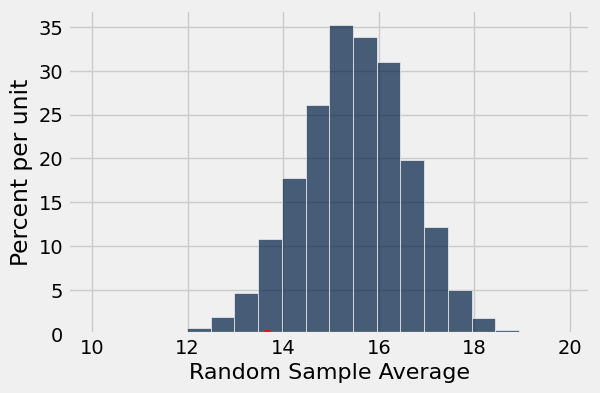

In [10]:
scores = Table.read_table('scores_by_section.csv')
scores

observed_average = 13.6667

# Simulate one value of the test statistic 
# under the hypothesis that the section is like a random sample from the class

def random_sample_midterm_avg():
    random_sample = scores.sample(27, with_replacement = False)
    return np.average(random_sample.column('Midterm'))

# Simulate 50,000 copies of the test statistic

sample_averages = make_array()

for i in np.arange(50000):
    sample_averages = np.append(sample_averages, random_sample_midterm_avg())    

# Compare the simulated distribution of the statistic
# and the actual observed statistic

averages_tbl = Table().with_column('Random Sample Average', sample_averages)
averages_tbl.hist(bins = 20)
plots.scatter(observed_average, 0, color = 'red', s=40);

back to slides

In [11]:
# finda all the times where the simulated average was less than or equal to the observed average
sample_averages <= observed_average

array([False, False,  True, ..., False, False, False], dtype=bool)

In [12]:
# < is a boolean operator
# the symbols on the left and right of it are operands

In [13]:
# now find all the trues
sum(sample_averages <= observed_average)

2796

In [14]:
sum(sample_averages <= observed_average) / 50000

0.055919999999999997

In [6]:
sum(sample_averages <= observed_average) / 50000

0.057939999999999998

In [ ]:
# 5% of 50,000 = 2500

five_percent_point = averages_tbl.sort(0).column(0).item(2500)
five_percent_point

In [ ]:
averages_tbl.hist(bins = 20)
plots.plot([five_percent_point, five_percent_point], [0, 0.35], color='gold', lw=2)
plots.title('Area to the left of the gold line: 5%');

# A/B Testing

In [15]:
births = Table.read_table('baby.csv')
births

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False
132,245,23,65,140,False
120,289,25,62,125,False
143,299,30,66,136,True
140,351,27,68,120,False


Let's quickly look at the table and ask:
1. What does each row represent?
2. What do the columns represent?

**Question:** Was there an association between baby health and whether the mother was a smoker?

In [16]:
smoking_and_birthweight = births.select('Maternal Smoker', 'Birth Weight')
smoking_and_birthweight

Maternal Smoker,Birth Weight
False,120
False,113
True,128
True,108
False,136
False,138
False,132
False,120
True,143
False,140


#### How many smokers and nonsmoker were there?
What table method can help us determine this?

<details>
<summary>Solution</summary>
  smoking_and_birthweight.group('Maternal Smoker')
</details>


In [17]:
  smoking_and_birthweight.group('Maternal Smoker')


Maternal Smoker,count
False,715
True,459


### Distribution of birth weights for the groups
We want to look at the distribution of birth weight 
for these two groups. 

What visualization should we use?
<details>
<summary>Solution</summary>
  histogram!
</details>
<details>
<summary>Code</summary>
  smoking_and_birthweight.hist('Birth Weight', group='Maternal Smoker')
</details>


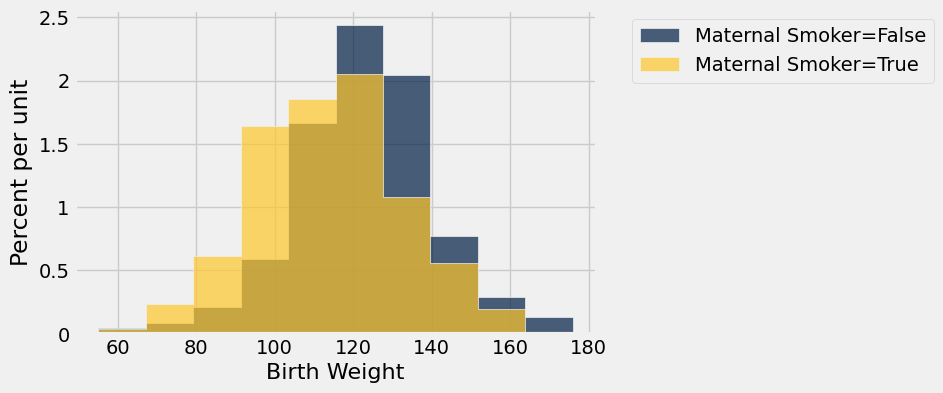

In [18]:
  smoking_and_birthweight.hist('Birth Weight', group='Maternal Smoker')


Do we see a difference between the two groups?

<details>
<summary>Solution</summary>
  Yes, the baby's whose mother's smoked were a little lighter on average
</details>

(back to slides)
## Test Statistic

In [19]:
means_table = smoking_and_birthweight.group('Maternal Smoker', np.average)
means_table

Maternal Smoker,Birth Weight average
False,123.085
True,113.819


In [20]:
means = means_table.column(1)
observed_difference = means.item(1) - means.item(0)
observed_difference

-9.266142572024918

In [21]:
def difference_of_means(table, label, group_label):
    """Takes: name of table, column label of numerical variable,
    column label of group-label variable
    Returns: Difference of means of the two groups"""
    
    #table with the two relevant columns
    reduced = table.select(label, group_label)  
    
    # table containing group means
    means_table = reduced.group(group_label, np.average)
    # array of group means
    means = means_table.column(1)
    
    return means.item(1) - means.item(0)

In [22]:
difference_of_means(births, 'Birth Weight', 'Maternal Smoker')

-9.266142572024918

(back to slides)
# Random Permutation (Shuffling)

In [23]:
letters = Table().with_column('Letter', make_array('a', 'b', 'c', 'd', 'e'))

In [24]:
letters

Letter
a
b
c
d
e


In [26]:
letters.sample()

Letter
e
c
b
d
e


In [31]:
# here the argument tells us how many rows to randomly sample
letters.sample(10)

Letter
c
e
b
c
c
e
b
b
a
d


In [32]:
letters.sample(10, with_replacement = False)

ValueError: Cannot take a larger sample than population when 'replace=False'

In [27]:
letters.sample(with_replacement = False)

Letter
c
b
d
e
a


In [28]:
letters.with_column('Shuffled', letters.sample(with_replacement = False).column(0))

Letter,Shuffled
a,b
b,e
c,c
d,d
e,a


# Simulation Under Null Hypothesis

In [29]:
smoking_and_birthweight

Maternal Smoker,Birth Weight
False,120
False,113
True,128
True,108
False,136
False,138
False,132
False,120
True,143
False,140


### Permute/Shuffle our data

In [33]:
shuffled_labels = smoking_and_birthweight.sample(with_replacement=False
                                                ).column('Maternal Smoker')
shuffled_labels

array([False, False,  True, ..., False, False,  True], dtype=bool)

In [34]:
original_and_shuffled = smoking_and_birthweight.with_column(
    'Shuffled Label', shuffled_labels
)

In [35]:
original_and_shuffled

Maternal Smoker,Birth Weight,Shuffled Label
False,120,False
False,113,False
True,128,True
True,108,False
False,136,False
False,138,False
False,132,False
False,120,False
True,143,False
False,140,False


how can we ensure that we have the same number of smoking mothers in our random sample as we had in our original/observed sample

In [36]:
original_and_shuffled.group('Shuffled Label')

Shuffled Label,count
False,715
True,459


In [38]:
original_and_shuffled.group('Maternal Smoker')

Maternal Smoker,count
False,715
True,459


In [39]:
difference_of_means(original_and_shuffled, 'Birth Weight', 'Shuffled Label')

-1.9435105199811034

In [40]:
difference_of_means(original_and_shuffled, 'Birth Weight', 'Maternal Smoker')

-9.266142572024918

## Permutation Test


In [41]:
def one_simulated_difference(table, label, group_label):
    """Takes: name of table, column label of numerical variable,
    column label of group-label variable
    Returns: Difference of means of the two groups after shuffling labels"""
    
    # array of shuffled labels
    shuffled_labels = table.sample(with_replacement = False
                                                    ).column(group_label)
    
    # table of numerical variable and shuffled labels
    shuffled_table = table.select(label).with_column(
        'Shuffled Label', shuffled_labels)
    
    return difference_of_means(shuffled_table, label, 'Shuffled Label') 

In [42]:
one_simulated_difference(births, 'Birth Weight', 'Maternal Smoker')

0.47113365936895946

In [44]:
%%time
differences = make_array()

for i in np.arange(2500):
    new_difference = one_simulated_difference(births, 'Birth Weight', 'Maternal Smoker')
    differences = np.append(differences, new_difference)

CPU times: user 28.8 s, sys: 1.94 ms, total: 28.8 s
Wall time: 28.8 s


Observed Difference: -9.266142572024918


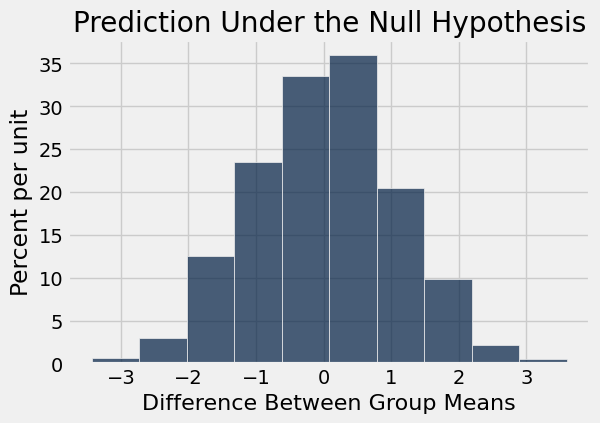

In [45]:
Table().with_column('Difference Between Group Means', differences).hist()
print('Observed Difference:', observed_difference)
plots.title('Prediction Under the Null Hypothesis');